In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [5]:
import pickle
import numpy as np
from tqdm import tqdm

In [6]:
pm_list = np.linspace(0.500,0.75,6)

In [7]:
pm = 0.5
with open(f'Clifford/Clifford_En(1,501)_EnC(1,501)_pm({pm:.3f},{pm:.3f},1)_alpha0.5_L16_T.pickle','rb') as f:
    data_ =pickle.load(f)

In [8]:
data_['args']

Namespace(L=16, es=[1, 501], es_C=[1, 501], p_m=[0.5, 0.5, 1.0], alpha=0.5, n_jobs=24)

In [10]:
data_['OP'].shape

(1, 500, 500, 90)

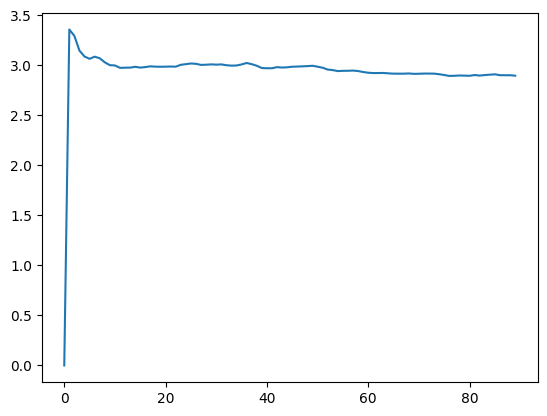

In [55]:
plt.plot(data_['EE'][0].mean(axis=(0,1)))

In [56]:
pm_list = np.linspace(0.500,0.75,6)
data=[]
data_EE=[]
for pm in pm_list:
    with open(f'Clifford/Clifford_L16/Clifford_En(1,501)_EnC(1,501)_pm({pm:.3f},{pm:.3f},1)_alpha0.5_L16_T.pickle','rb') as f:
        data_ =pickle.load(f)
        op_mean = data_['OP'][0].mean(axis=(0,1))[-1]
        ee_mean = data_['EE'][0].mean(axis=(0,1))[-1]
        data.append( op_mean)
        data_EE.append( ee_mean)

In [57]:
# pm_list = np.linspace(0.500,0.75,6)
data2=[]
data2_EE=[]
for pm in pm_list:
    with open(f'Clifford/Clifford_L32/Clifford_En(1,501)_EnC(1,501)_pm({pm:.3f},{pm:.3f},1)_alpha0.5_L32_T.pickle','rb') as f:
        data_ =pickle.load(f)
        op_mean = data_['OP'][0].mean(axis=(0,1))[-1]
        ee_mean = data_['EE'][0].mean(axis=(0,1))[-1]
        data2.append( op_mean)
        data2_EE.append( ee_mean)

In [58]:
data3=[]
data3_EE=[]
EnC_list = np.arange(1, 501,100)
for pm in tqdm(pm_list):
    op_mean=[]
    ee_mean = []
    for EnC in tqdm(EnC_list): 
        with open(f'Clifford/Clifford_L64/Clifford_En(1,501)_EnC({EnC},{EnC+100})_pm({pm:.3f},{pm:.3f},1)_alpha0.5_L64_T.pickle','rb') as f:
            data_ =pickle.load(f)
            op_mean.append( data_['OP'][0].mean(axis=(0,1))[-1])
            ee_mean.append( data_['EE'][0].mean(axis=(0,1))[-1])
    data3.append( np.mean(op_mean))
    data3_EE.append( np.mean(ee_mean))

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:37<00:00,  6.29s/it]


In [15]:
data_['EE'].shape

(1, 500, 500, 275)

In [7]:
data['OP'].shape

(1, 500, 500, 90)

In [44]:
len(data2)

6

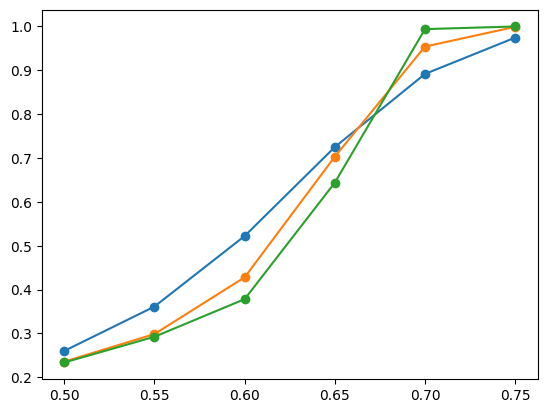

In [62]:
plt.plot(pm_list, 2 * np.array(data) - 1, 'o-')
plt.plot(pm_list, 2 * np.array(data2)-1, 'o-')
plt.plot(pm_list, 2 * np.array(data3)-1, 'o-')

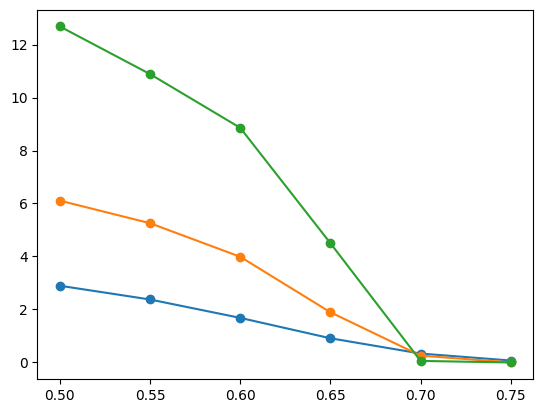

In [60]:
plt.plot(pm_list, data_EE, 'o-')
plt.plot(pm_list, data2_EE, 'o-')
plt.plot(pm_list, data3_EE, 'o-')

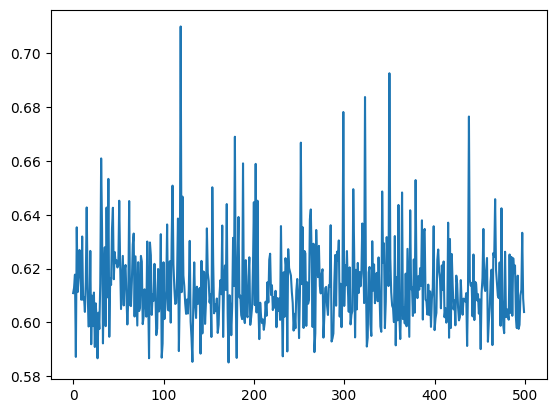

In [29]:
plt.plot(data[0]['OP'][0].mean(axis=(1,2)))

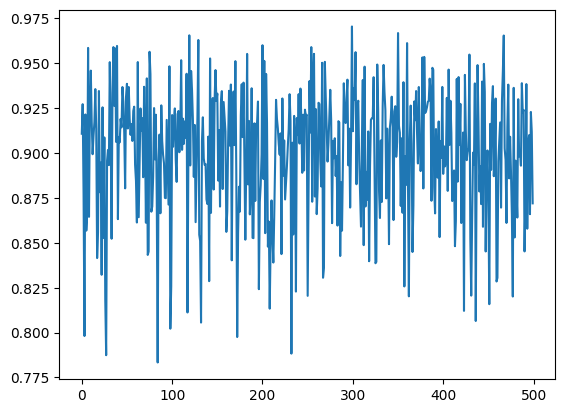

In [31]:
plt.plot(data[-1]['OP'][0].mean(axis=(1,2)))

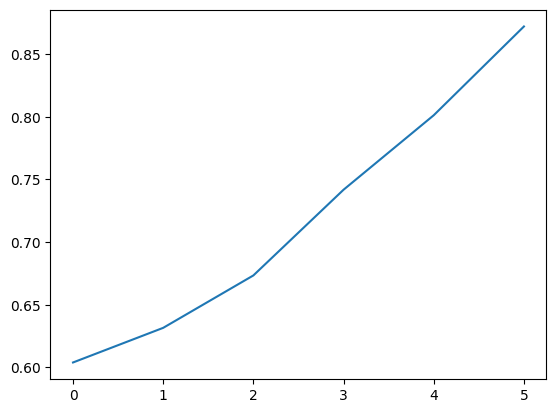

In [ ]:
plt.plot([x['OP'][0].mean(axis=(1,2))[-1] for x in data],'.-')
plt.plot([x['OP'][0].mean(axis=(1,2))[-1] for x in data2],'.-')

In [8]:
data.keys()

dict_keys(['OP', 'OP2', 'EE', 'coherence', 'args'])

# Load

In [2]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile
from itertools import product
from tqdm import tqdm

# Prefer the installed rqc package
SITE_PACKAGES = '/home/hp636/.pyenv/versions/miniforge3-25.1.1-2/lib/python3.13/site-packages'
PROJECT_ROOT = '/scratch/hp636/control_transition'
LOCAL_RQC = str(Path(PROJECT_ROOT) / 'rqc')

clean_sys_path = []
for p in sys.path:
    if p in ('', os.getcwd(), PROJECT_ROOT, LOCAL_RQC):
        continue
    if 'control_transition' in p and 'site-packages' not in p:
        continue
    clean_sys_path.append(p)
if SITE_PACKAGES not in clean_sys_path:
    clean_sys_path.insert(0, SITE_PACKAGES)
sys.path = clean_sys_path

if 'rqc' in sys.modules:
    del sys.modules['rqc']
importlib.invalidate_caches()
import rqc

In [16]:
# Configuration for batch loading

batch_config = {
    # L=16: max es*es_C = 864000/0.225 = 3.84M, use 500*500=250k (1 job per p_m)
    16: {'total_es': 500, 'total_es_C': 500, 'es_batch': 500, 'es_C_batch': 500},

    # # L=32: max es*es_C = 864000/0.944 = 915k, use 500*500=250k (1 job per p_m)
    # 32: {'total_es': 500, 'total_es_C': 500, 'es_batch': 500, 'es_C_batch': 500},

    # # L=64: max es*es_C = 864000/6.626 = 130k, use 500*100=50k (5 jobs per p_m)
    # 64: {'total_es': 500, 'total_es_C': 500, 'es_batch': 500, 'es_C_batch': 100},

    # # L=128: max es*es_C = 864000/89.7 = 9632, use 500*10=5k (50 jobs per p_m)
    # 128: {'total_es': 500, 'total_es_C': 500, 'es_batch': 500, 'es_C_batch': 10},

    # # L=256: max es*es_C = 864000/1499 = 576, use 125*1=125 (2000 jobs per p_m)
    # 256: {'total_es': 500, 'total_es_C': 500, 'es_batch': 125, 'es_C_batch': 1},
}

L_values = list(batch_config.keys())

# p_m values
# p_m_values = np.array([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])  # 6 values
p_m_values = np.array([0.75, ])  # 6 values
alpha = 0.5
params_list = []


for L in L_values:
    cfg = batch_config[L]
    total_es = cfg['total_es']
    total_es_C = cfg['total_es_C']
    es_batch = cfg['es_batch']
    es_C_batch = cfg['es_C_batch']

    # Verify divisibility
    assert total_es % es_batch == 0, f"L={L}: es_batch={es_batch} must divide total_es={total_es}"
    assert total_es_C % es_C_batch == 0, f"L={L}: es_C_batch={es_C_batch} must divide total_es_C={total_es_C}"

    num_es_batches = total_es // es_batch
    num_es_C_batches = total_es_C // es_C_batch

    # Pre-compute all es_range and es_C_range tuples
    es_ranges = [(es_batch_idx * es_batch + 1, (es_batch_idx + 1) * es_batch + 1)
                 for es_batch_idx in range(num_es_batches)]
    es_C_ranges = [(es_C_batch_idx * es_C_batch + 1, (es_C_batch_idx + 1) * es_C_batch + 1)
                   for es_C_batch_idx in range(num_es_C_batches)]

    fixed_params = {
        'L': L,
        'alpha': alpha,
    }

    vary_params = {
        'p_m': p_m_values,
        'es_range': es_ranges,
        'es_C_range': es_C_ranges,
    }

    params_list.append((fixed_params, vary_params))



In [17]:
params_list

[({'L': 16, 'alpha': 0.5},
  {'p_m': array([0.75]), 'es_range': [(1, 501)], 'es_C_range': [(1, 501)]})]

In [18]:
def load_clifford():
    data_dict = {'fn': set()}
    for fixed_params, vary_params in params_list:
        rqc.generate_params(
            fixed_params=fixed_params,
            vary_params=vary_params,
            fn_template='Clifford_En({es_range[0]},{es_range[1]})_EnC({es_C_range[0]},{es_C_range[1]})_pm({p_m:.3f},{p_m:.3f},1)_alpha{alpha:.1f}_L{L}_T.pickle',
            fn_dir_template='Clifford',
            input_params_template='--L {L} --p_m {p_m:.3f} {p_m:.3f} 1 --alpha {alpha:.1f} --es {es_range[0]} {es_range[1]} --es_C {es_C_range[0]} {es_C_range[1]}',
            load_data=rqc.load_pickle,
            filename=None,
            load=True,
            data_dict=data_dict,
        )
    return rqc.convert_pd(data_dict, names=['Metrics', 'L', 'p_m', 'es_m', 'es_C'])

In [19]:
df = load_clifford()

generate_params:   0%|                                                                                                                                                                                      | 0/1 [00:00<?, ?it/s]

generate_params: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.13s/it]


In [22]:
df.index.get_level_values('Metrics').unique()

Index(['coherence', 'OP', 'OP2', 'EE'], dtype='object', name='Metrics')

In [ ]:




# Filename template
FN_TEMPLATE = 'Clifford_En(1,501)_EnC({es_C_range[0]},{es_C_range[1]})_pm({p_m:.3f},{p_m:.3f},1)_alpha0.5_L{L}_T.pickle'


def parse_clifford_data(data_dict, data, filename):
    """Custom parser for Clifford data with multiple metrics (OP, OP2, EE, coherence)"""
    data_dict['fn'].add(filename)

    args = data['args']
    L = args.L
    p_m_list = np.round(np.linspace(args.p_m[0], args.p_m[1], int(args.p_m[2])), 3)
    es_C_list = np.arange(*args.es_C)
    es_m_list = np.arange(*args.es)

    # Metrics to parse: OP, OP2, EE, coherence
    # Data shape: (p_m, es_C, es_m, T)
    metrics = ['OP', 'OP2', 'EE', 'coherence']

    for metric in metrics:
        if metric not in data:
            continue
        metric_data = data[metric]
        for p_m_idx, p_m in enumerate(p_m_list):
            for es_C_idx, es_C in enumerate(es_C_list):
                for es_m_idx, es_m in enumerate(es_m_list):
                    observations = metric_data[p_m_idx, es_C_idx, es_m_idx]
                    params = (metric, L, p_m, es_C, es_m)
                    data_dict[params] = observations


def load_clifford_coherence(L_list=(16, 32, 64, 128), zip_dir='Clifford'):
    """Load Clifford coherence/OP/EE data into a parsed dictionary."""
    data_dict = {'fn': set()}

    for L in L_list:
        cfg = BATCH_CONFIG[L]
        es_ranges = []
        for batch_idx in range(cfg['num_batches']):
            es_start = 1 + batch_idx * cfg['es_C_batch']
            es_end = 1 + (batch_idx + 1) * cfg['es_C_batch']
            es_ranges.append((es_start, es_end))

        ZIP_PATH = os.path.join(zip_dir, f'Clifford_L{L}.zip')
        z = zipfile.ZipFile(ZIP_PATH, 'r')
        all_fns = set(z.namelist())

        vary_params = {'p_m': P_M_LIST, 'es_C_range': es_ranges}
        inputs = product(*vary_params.values())
        total = np.prod([len(val) for val in vary_params.values()])

        for input0 in tqdm(inputs, mininterval=1, desc=f'Loading L={L}', total=total):
            dict_params = {key: val for key, val in zip(vary_params.keys(), input0)}
            dict_params['L'] = L
            fn = FN_TEMPLATE.format(**dict_params)

            if fn not in data_dict['fn'] and fn in all_fns:
                try:
                    data = rqc.load_zip_pickle(fn, z)
                    parse_clifford_data(data_dict, data, fn)
                except Exception as e:
                    print(f'Error loading {fn}: {e}')

        z.close()

    return data_dict


def clifford_to_df(data_dict):
    """Convert the loaded Clifford dictionary to a pandas DataFrame."""
    return rqc.convert_pd(data_dict, names=['Metrics', 'L', 'p_m', 'es_C', 'es_m'])

In [10]:
# Load all data
data_dict = load_clifford_coherence(L_list=(16,))

Loading L=16:   0%|          | 0/6 [00:00<?, ?it/s]

Loading L=16: 100%|██████████| 6/6 [00:17<00:00,  2.89s/it]


In [11]:
# Convert to DataFrame
df = clifford_to_df(data_dict)
print(f"DataFrame shape: {df.shape}")
print(f"Index levels: {df.index.names}")
print(f"Unique metrics: {df.index.get_level_values('Metrics').unique().tolist()}")

DataFrame shape: (6000000, 1)
Index levels: ['Metrics', 'L', 'p_m', 'es_C', 'es_m']
Unique metrics: ['OP', 'OP2', 'EE', 'coherence']


In [12]:
df.head(20)

observations
Metrics L  p_m es_C es_m                                                   
OP      16 0.5 1    1     [0.0, 0.5625, 0.59375, 0.625, 0.5625, 0.5, 0.6...
                    2     [0.0, 0.5625, 0.6875, 0.625, 0.53125, 0.5, 0.6...
                    3     [0.0, 0.5, 0.71875, 0.53125, 0.5, 0.46875, 0.5...
                    4     [0.0, 0.53125, 0.59375, 0.6875, 0.5, 0.5, 0.46...
                    5     [0.0, 0.4375, 0.5625, 0.5625, 0.53125, 0.5, 0....
                    6     [0.0, 0.5625, 0.75, 0.75, 0.75, 0.6875, 0.6562...
                    7     [0.0, 0.625, 0.59375, 0.625, 0.53125, 0.53125,...
                    8     [0.0, 0.5625, 0.71875, 0.59375, 0.40625, 0.593...
                    9     [0.0, 0.5625, 0.625, 0.65625, 0.65625, 0.5625,...
                    10    [0.0, 0.53125, 0.46875, 0.6875, 0.5625, 0.5, 0...
                    11    [0.0, 0.53125, 0.65625, 0.625, 0.625, 0.5625, ...
                    12    [0.0, 0.46875, 0.5625, 0.5, 0.53125, 0.5625, 0...
                    13    [0.0, 0.5, 0.59375, 0.625, 0.5625, 0.5, 0.5937...
                    14    [0.0, 0.59375, 0.625, 0.6875, 0.5, 0.5, 0.625,...
                    15    [0.0, 0.46875, 0.46875, 0.6875, 0.53125, 0.593...
                    16    [0.0, 0.5625, 0.71875, 0.625, 0.53125, 0.5625,...
                    17    [0.0, 0.5625, 0.71875, 0.5625, 0.5625, 0.5, 0....
                    18    [0.0, 0.59375, 0.75, 0.625, 0.53125, 0.46875, ...
                    19    [0.0, 0.5625, 0.8125, 0.59375, 0.5625, 0.5625,...
                    20    [0.0, 0.46875, 0.6875, 0.53125, 0.53125, 0.531...

In [ ]:
# Check available L values and p_m values
print("L values:", sorted(df.index.get_level_values('L').unique()))
print("p_m values:", sorted(df.index.get_level_values('p_m').unique()))

In [ ]:
# Example: Get coherence data for L=16, p_m=0.5
coherence_L16_pm05 = df.xs(('coherence', 16, 0.5), level=('Metrics', 'L', 'p_m'))
print(f"Coherence data for L=16, p_m=0.5: {coherence_L16_pm05.shape}")
coherence_L16_pm05.head()

In [ ]:
# Plot coherence vs T for different L values at fixed p_m
def plot_metric_vs_T(df, metric='coherence', p_m=0.5, L_list=None, es_C_sample=1, es_m_sample=1, ax=None):
    """Plot a metric vs time steps T for different L values."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    if L_list is None:
        L_list = sorted(df.index.get_level_values('L').unique())
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(L_list)))
    
    for L, color in zip(L_list, colors):
        try:
            data = df.xs((metric, L, p_m, es_C_sample, es_m_sample), 
                        level=('Metrics', 'L', 'p_m', 'es_C', 'es_m'))['observations'].values[0]
            T = np.arange(len(data))
            ax.plot(T, data, label=f'L={L}', color=color)
        except KeyError:
            continue
    
    ax.set_xlabel('T (time steps)')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs T (p_m={p_m}, es_C={es_C_sample}, es_m={es_m_sample})')
    ax.legend()
    return ax

In [ ]:
# Plot coherence for p_m=0.5
plot_metric_vs_T(df, metric='coherence', p_m=0.5, es_C_sample=1, es_m_sample=1)

In [ ]:
# Plot OP (order parameter) for p_m=0.5
plot_metric_vs_T(df, metric='OP', p_m=0.5, es_C_sample=1, es_m_sample=1)

In [ ]:
# Plot EE (entanglement entropy) for p_m=0.5
plot_metric_vs_T(df, metric='EE', p_m=0.5, es_C_sample=1, es_m_sample=1)

In [ ]:
# Average over es_C and es_m for a given metric, L, p_m
def compute_average_metric(df, metric='coherence', L=16, p_m=0.5):
    """Compute ensemble average of a metric over es_C and es_m."""
    metric_data = df.xs((metric, L, p_m), level=('Metrics', 'L', 'p_m'))
    # Stack all observations and compute mean
    all_obs = np.stack(metric_data['observations'].values)
    mean_obs = np.mean(all_obs, axis=0)
    std_obs = np.std(all_obs, axis=0)
    return mean_obs, std_obs

In [ ]:
# Plot average coherence vs T for different L
fig, ax = plt.subplots(figsize=(8, 6))
L_list = sorted(df.index.get_level_values('L').unique())
p_m = 0.5

colors = plt.cm.viridis(np.linspace(0, 1, len(L_list)))

for L, color in zip(L_list, colors):
    mean_obs, std_obs = compute_average_metric(df, metric='coherence', L=L, p_m=p_m)
    T = np.arange(len(mean_obs))
    ax.plot(T, mean_obs, label=f'L={L}', color=color)
    ax.fill_between(T, mean_obs - std_obs, mean_obs + std_obs, alpha=0.2, color=color)

ax.set_xlabel('T (time steps)')
ax.set_ylabel('Coherence (ensemble average)')
ax.set_title(f'Average Coherence vs T (p_m={p_m})')
ax.legend()
plt.show()

In [ ]:
# Plot average OP vs T for different p_m at fixed L
fig, ax = plt.subplots(figsize=(8, 6))
L = 16
p_m_list = sorted(df.index.get_level_values('p_m').unique())

colors = plt.cm.coolwarm(np.linspace(0, 1, len(p_m_list)))

for p_m, color in zip(p_m_list, colors):
    mean_obs, std_obs = compute_average_metric(df, metric='OP', L=L, p_m=p_m)
    T = np.arange(len(mean_obs))
    ax.plot(T, mean_obs, label=f'p_m={p_m}', color=color)

ax.set_xlabel('T (time steps)')
ax.set_ylabel('OP (ensemble average)')
ax.set_title(f'Average OP vs T (L={L})')
ax.legend()
plt.show()

In [ ]:
# Plot all four metrics for a given L and p_m
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ['OP', 'OP2', 'EE', 'coherence']
L = 16
p_m = 0.5

for ax, metric in zip(axes.flat, metrics):
    mean_obs, std_obs = compute_average_metric(df, metric=metric, L=L, p_m=p_m)
    T = np.arange(len(mean_obs))
    ax.plot(T, mean_obs, 'b-', label='mean')
    ax.fill_between(T, mean_obs - std_obs, mean_obs + std_obs, alpha=0.3)
    ax.set_xlabel('T (time steps)')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} (L={L}, p_m={p_m})')

plt.tight_layout()
plt.show()

In [ ]:
# Fluctuation analysis: variance of metrics over ensemble
def compute_variance_metric(df, metric='coherence', L=16, p_m=0.5):
    """Compute variance of a metric over es_C and es_m."""
    metric_data = df.xs((metric, L, p_m), level=('Metrics', 'L', 'p_m'))
    all_obs = np.stack(metric_data['observations'].values)
    var_obs = np.var(all_obs, axis=0)
    return var_obs

In [ ]:
# Plot variance of coherence vs T
fig, ax = plt.subplots(figsize=(8, 6))
L_list = sorted(df.index.get_level_values('L').unique())
p_m = 0.5

colors = plt.cm.viridis(np.linspace(0, 1, len(L_list)))

for L, color in zip(L_list, colors):
    var_obs = compute_variance_metric(df, metric='coherence', L=L, p_m=p_m)
    T = np.arange(len(var_obs))
    ax.plot(T, var_obs, label=f'L={L}', color=color)

ax.set_xlabel('T (time steps)')
ax.set_ylabel('Var(Coherence)')
ax.set_title(f'Coherence Variance vs T (p_m={p_m})')
ax.legend()
ax.set_yscale('log')
plt.show()